## Used Car Price Prediction 

In [1]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
plt.style.use('classic')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/Craiglist Vehicle Info/vehicles.csv"

cars_data = pd.read_csv(file_path)
cars_data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,gas,76237.0,clean,automatic,NaN,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,gas,199000.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,gas,54000.0,clean,automatic,1GCCS196448191644,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [4]:
# Checking the features and no. of records in the dataset.

cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

##### There are 400K+ records and 25 features. The aim is to predict vehicle Price.

### EDA

In [5]:
# Checking the percentage of missing values for each feature
cars_data.isnull().mean()

id              0.000000
url             0.000000
region          0.000000
region_url      0.000000
price           0.000000
year            0.002563
manufacturer    0.047601
model           0.014223
condition       0.428603
cylinders       0.381747
fuel            0.006862
odometer        0.172418
title_status    0.004144
transmission    0.004924
vin             0.451193
drive           0.279939
size            0.679045
type            0.268689
paint_color     0.310307
image_url       0.000055
description     0.000062
county          1.000000
state           0.000000
lat             0.018894
long            0.018894
dtype: float64

In [6]:
# Dropping duplicate records, if any
cars_data.drop_duplicates(inplace = True)

In [7]:
# Dropping features which have more than 60% missing values
cars_data.dropna(thresh = len(cars_data) * 0.6, axis = 1, inplace = True)

In [8]:
cars_data["description"] = cars_data["description"].astype(str)
cars_data["description"] = cars_data["description"].apply(lambda x : x.upper())

In [9]:
# Adding the description length as feature
cars_data['Description Length'] = cars_data["description"].apply(lambda x: len(x))

In [10]:
# Dropping features that seems not useful
cars_data = cars_data.drop(['id', 'url', 'region_url', 'lat', 'long', 'description', 'image_url'], axis = 1)

#### Univariate Analysis

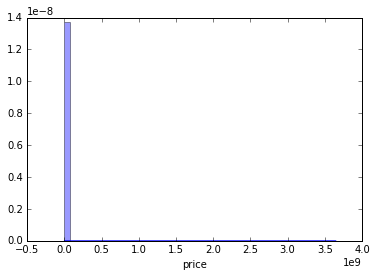

In [11]:
#Checking the dependent variable "Price" to detect outliers

sns.distplot(cars_data["price"], bins=50, hist=True, kde=True)
plt.show()

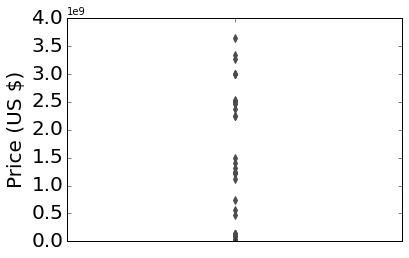

In [12]:
sns.boxplot("price", data = cars_data, orient = "v")
plt.tick_params(labelsize = 20)
plt.ylabel("Price (US $)", fontsize = 20)
plt.show()

In [13]:
quantile_price = cars_data["price"].quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("{}th percentile value of Price is {}".format((int(i*100)), quantile_price[i]))

0th percentile value of Price is 0.0
10th percentile value of Price is 1000.0
20th percentile value of Price is 3950.0
30th percentile value of Price is 5800.0
40th percentile value of Price is 7790.200000000012
50th percentile value of Price is 9995.0
60th percentile value of Price is 12987.799999999988
70th percentile value of Price is 15990.0
80th percentile value of Price is 19998.0
90th percentile value of Price is 27765.0
100th percentile value of Price is 3647256576.0


In [14]:
quantile_price = cars_data["price"].quantile(np.round(np.arange(0.90, 1.01, 0.01), 2))
qValues = np.round(np.arange(0.90, 1.01, 0.01), 2)
for i in qValues:
    print("{}th percentile value of Price is {}".format((int(i*100)), quantile_price[i]))

90th percentile value of Price is 27765.0
91th percentile value of Price is 28599.0
92th percentile value of Price is 29900.0
93th percentile value of Price is 30990.0
94th percentile value of Price is 32900.0
95th percentile value of Price is 34750.0
96th percentile value of Price is 36900.0
97th percentile value of Price is 39888.0
98th percentile value of Price is 44418.27999999985
99th percentile value of Price is 53566.0
100th percentile value of Price is 3647256576.0


In [15]:
quantile_price = cars_data["price"].quantile(np.round(np.arange(0.990, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.990, 1.001, 0.001), 4)
for i in qValues:
    print("{}th percentile value of Price is {}".format(((i*100)), quantile_price[i]))

99.0th percentile value of Price is 53566.0
99.1th percentile value of Price is 54999.0
99.2th percentile value of Price is 56995.0
99.3th percentile value of Price is 59000.0
99.4th percentile value of Price is 60777.91200000007
99.5th percentile value of Price is 63999.0
99.6th percentile value of Price is 67898.04000000004
99.7th percentile value of Price is 73995.0
99.8th percentile value of Price is 84152.00000000186
99.9th percentile value of Price is 111111.0
100.0th percentile value of Price is 3647256576.0


In [16]:
quantile_price = cars_data["price"].quantile(np.round(np.arange(0.00, 0.1, 0.01), 2))
qValues = np.round(np.arange(0.00, 0.1, 0.01), 2)
for i in qValues:
    print("{}th percentile value of Price is {}".format((int(i*100)), quantile_price[i]))

0th percentile value of Price is 0.0
1th percentile value of Price is 0.0
2th percentile value of Price is 0.0
3th percentile value of Price is 0.0
4th percentile value of Price is 0.0
5th percentile value of Price is 0.0
6th percentile value of Price is 0.0
7th percentile value of Price is 0.0
8th percentile value of Price is 160.0
9th percentile value of Price is 500.0


In [17]:
outliers_price = cars_data[cars_data["price"] > 84152]
print("Total records: ", outliers_price.shape[0])
print("The percentage of outlier data points : ", round(outliers_price.shape[0] / len(cars_data), 5))

Total records:  872
The percentage of outlier data points :  0.002


In [18]:
outliers_price = cars_data[cars_data["price"] < cars_data["price"].quantile(0.1)]
print("Total records: ", outliers_price.shape[0])
print("The percentage of outlier data points : ", round(outliers_price.shape[0] / len(cars_data), 5))

Total records:  42474
The percentage of outlier data points :  0.09745


In [19]:
outliers_price = cars_data[cars_data["price"] > 60000]
print("Total records: ", outliers_price.shape[0])
print("The percentage of outlier data points : ", round(outliers_price.shape[0] / len(cars_data), 5))

Total records:  2641
The percentage of outlier data points :  0.00606


In [20]:
cars_data = cars_data[(cars_data["price"] >= cars_data["price"].quantile(0.1)) & (cars_data["price"] < cars_data["price"].quantile(0.998))]

In [21]:
cars_data = cars_data[(cars_data["price"] <= 60000)]

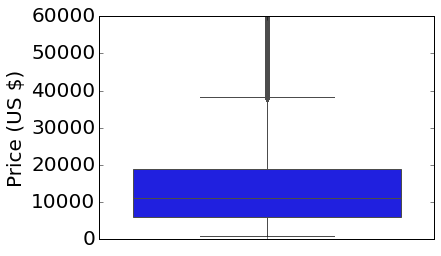

In [22]:
sns.boxplot("price", data = cars_data, orient = "v")
plt.tick_params(labelsize = 20)
plt.ylabel("Price (US $)", fontsize = 20)
plt.show()

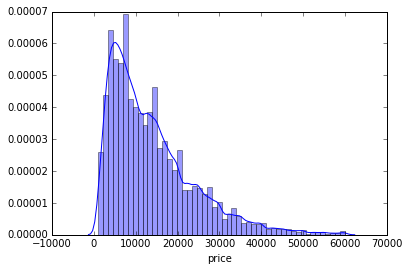

In [23]:
#Checking the dependent variable "Price" to detect outliers
sns.distplot(cars_data["price"], bins=50, hist=True, kde=True)
plt.show()

In [24]:
# Region

cars_data["region"].value_counts()

springfield                   3125
jacksonville                  2969
columbus                      2939
grand rapids                  2908
anchorage / mat-su            2895
omaha / council bluffs        2883
denver                        2869
baltimore                     2843
nashville                     2837
des moines                    2835
colorado springs              2830
milwaukee                     2828
portland                      2805
madison                       2804
kansas city, MO               2803
fort collins / north CO       2792
boise                         2786
tampa bay area                2780
indianapolis                  2780
ft myers / SW florida         2777
sacramento                    2776
north jersey                  2767
phoenix                       2766
las vegas                     2763
minneapolis / st paul         2753
tucson                        2751
stockton                      2744
spokane / coeur d'alene       2739
pittsburgh          

In [25]:
# State

cars_data["state"].value_counts()

ca    41531
fl    28561
tx    21907
ny    15526
or    14490
oh    14428
mi    13913
nc    13504
wi    13446
tn    11662
wa    11216
co    10797
pa     9923
ia     9399
id     8868
va     8748
mn     8731
il     8628
nj     8297
mt     8279
az     7738
ma     6822
sc     6630
ks     5838
in     5634
al     5593
ok     5447
ga     5359
mo     4662
ct     4547
ky     4321
ar     4297
md     4105
ak     3760
nm     3744
la     3117
nv     2903
hi     2649
dc     2639
nh     2568
vt     2446
me     2367
ri     2362
sd     1804
ne     1746
ms     1658
ut     1417
de      943
wy      683
wv      582
nd      499
Name: state, dtype: int64

In [26]:
# City and Region would not affect the pricing of the vehicle, so they can be dropped

cars_data.drop(labels=["region", "state"], axis = 1, inplace = True)

In [27]:
cars_data["year"].sort_values().value_counts().sort_index()

1900.0        5
1911.0        1
1912.0        5
1915.0        1
1916.0        3
1917.0        1
1919.0        2
1920.0        1
1922.0        4
1923.0       37
1924.0        7
1925.0        9
1926.0       10
1927.0       33
1928.0       27
1929.0       65
1930.0       48
1931.0       58
1932.0       32
1933.0       16
1934.0       35
1935.0       16
1936.0       45
1937.0       69
1938.0       21
1939.0       54
1940.0       89
1941.0       57
1942.0       22
1944.0        2
1945.0        1
1946.0       77
1947.0       60
1948.0       97
1949.0      107
1950.0      111
1951.0      104
1952.0       81
1953.0       86
1954.0       77
1955.0      203
1956.0      175
1957.0      201
1958.0       83
1959.0       88
1960.0       90
1961.0       79
1962.0      143
1963.0      193
1964.0      270
1965.0      337
1966.0      462
1967.0      391
1968.0      392
1969.0      421
1970.0      372
1971.0      346
1972.0      402
1973.0      351
1974.0      270
1975.0      203
1976.0      254
1977.0  

In [28]:
# Filling the missing year with 2017 which seems to be the most frequent year

cars_data["year"] = cars_data["year"].fillna(2017)

In [29]:
# 2021 year is impossible given we are in 2020, so replaced the values with 2017 which is most frequent year

cars_data["year"] = cars_data["year"].replace(2021, 2017)

In [30]:
cars_data["year"] = cars_data["year"].astype('int')

In [31]:
cars_data["manufacturer"].value_counts()

ford               69877
chevrolet          55989
toyota             31550
nissan             20533
honda              20434
ram                18056
jeep               17922
gmc                16903
dodge              12507
bmw                11415
subaru              9713
hyundai             9355
volkswagen          9047
mercedes-benz       8521
kia                 6997
chrysler            5929
cadillac            5604
lexus               5164
buick               5090
mazda               4835
audi                4553
acura               3063
infiniti            3005
lincoln             2619
pontiac             2556
volvo               2529
mitsubishi          2145
mini                1828
rover               1631
mercury             1163
saturn              1089
fiat                 868
jaguar               858
tesla                252
harley-davidson      135
datsun                65
alfa-romeo            58
aston-martin          25
land rover            23
porche                22


In [32]:
cars_data["model"].value_counts()

f-150                7167
silverado 1500       4798
1500                 3945
silverado            3589
camry                2945
                     ... 
volt base               1
l-9000                  1
avanger r/t             1
4x4 1500 big horn       1
FORDF-450               1
Name: model, Length: 31423, dtype: int64

In [33]:
# Manufacturer and Model can be dropped as they represent the various types of vehicles

cars_data.drop(labels=["manufacturer", "model"], axis = 1, inplace = True)

In [34]:
# Cylinders

cars_data["cylinders"].value_counts()

6 cylinders     87564
4 cylinders     78799
8 cylinders     75007
5 cylinders      2327
10 cylinders     1315
other             962
3 cylinders       509
12 cylinders      147
Name: cylinders, dtype: int64

In [35]:
cars_data["cylinders"] = cars_data["cylinders"].apply(lambda x: str(x).replace('cylinders','').strip())

In [36]:
cars_data["cylinders"] = pd.to_numeric(cars_data["cylinders"], errors = 'coerce')

In [37]:
cars_data["cylinders"].fillna(cars_data["cylinders"].median(), inplace = True)

In [38]:
# Fuel

cars_data["fuel"].value_counts()

gas         339642
diesel       33170
other        10412
hybrid        3883
electric       907
Name: fuel, dtype: int64

In [39]:
cars_data[cars_data["fuel"].isna()]

,price,year,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,Description Length
104,11761,2012,6.0,NaN,101324.0,NaN,automatic,rwd,SUV,black,5889
351,38431,2017,8.0,NaN,42455.0,NaN,automatic,rwd,SUV,NaN,7782
382,4200,2007,6.0,NaN,156146.0,clean,automatic,fwd,sedan,grey,3599
460,8980,2010,8.0,NaN,157867.0,NaN,manual,rwd,pickup,black,3991
628,3950,2006,8.0,NaN,0.0,clean,automatic,rwd,sedan,NaN,3625
...,...,...,...,...,...,...,...,...,...,...,...
434139,19999,2018,6.0,NaN,12810.0,clean,automatic,rwd,NaN,NaN,1486
434162,9999,2015,4.0,NaN,62750.0,clean,automatic,fwd,sedan,silver,2307
434467,9800,2011,8.0,NaN,184000.0,clean,automatic,4wd,pickup,black,1877
435298,23900,2017,6.0,NaN,14987.0,NaN,automatic,rwd,pickup,NaN,3690


In [40]:
cars_data["fuel"].fillna("gas", inplace = True)

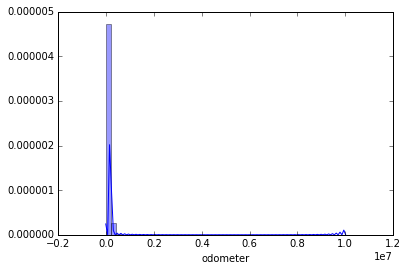

In [41]:
#Odometer

sns.distplot(cars_data["odometer"], bins=50, hist=True, kde=True)
plt.show()

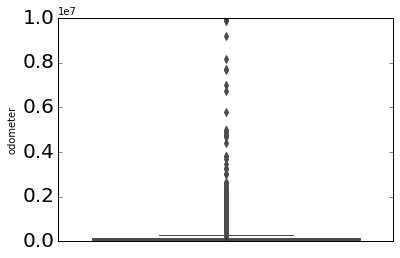

In [42]:
sns.boxplot("odometer", data = cars_data, orient = "v")
plt.tick_params(labelsize = 20)
plt.show()

In [43]:
quantile_odometer = cars_data["odometer"].quantile(np.round(np.arange(0.0, 0.1, 0.01), 2))
qValues = np.round(np.arange(0.0, 0.1, 0.01), 2)
for i in qValues:
    print("{}th percentile value of Odometer is {}".format((int(i*100)), quantile_odometer[i]))

0th percentile value of Odometer is 0.0
1th percentile value of Odometer is 112.0
2th percentile value of Odometer is 1349.2800000000007
3th percentile value of Odometer is 6000.0
4th percentile value of Odometer is 9816.0
5th percentile value of Odometer is 12679.0
6th percentile value of Odometer is 15247.0
7th percentile value of Odometer is 17562.0
8th percentile value of Odometer is 19660.0
9th percentile value of Odometer is 21690.759999999995


In [44]:
quantile_odometer = cars_data["odometer"].quantile(np.round(np.arange(0.00, 1.01, 0.1), 2))
qValues = np.round(np.arange(0.00, 1.01, 0.1), 2)
for i in qValues:
    print("{}th percentile value of Odometer is {}".format((int(i*100)), quantile_odometer[i]))

0th percentile value of Odometer is 0.0
10th percentile value of Odometer is 23792.200000000004
20th percentile value of Odometer is 41000.0
30th percentile value of Odometer is 59733.0
40th percentile value of Odometer is 77446.0
50th percentile value of Odometer is 93548.0
60th percentile value of Odometer is 109251.0
70th percentile value of Odometer is 127000.0
80th percentile value of Odometer is 147882.0
90th percentile value of Odometer is 177970.3999999999
100th percentile value of Odometer is 10000000.0


In [45]:
quantile_odometer = cars_data["odometer"].quantile(np.round(np.arange(0.91, 1.01, 0.01), 2))
qValues = np.round(np.arange(0.91, 1.01, 0.01), 2)
for i in qValues:
    print("{}th percentile value of Odometer is {}".format((int(i*100)), quantile_odometer[i]))

91th percentile value of Odometer is 181573.15999999992
92th percentile value of Odometer is 186055.0
93th percentile value of Odometer is 191415.0
94th percentile value of Odometer is 198000.0
95th percentile value of Odometer is 204000.0
96th percentile value of Odometer is 213110.0
97th percentile value of Odometer is 225000.0
98th percentile value of Odometer is 242000.0
99th percentile value of Odometer is 275531.0
100th percentile value of Odometer is 10000000.0


In [46]:
quantile_odometer = cars_data["odometer"].quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 4)
for i in qValues:
    print("{}th percentile value of Odometer is {}".format(((i*100)), quantile_odometer[i]))

99.1th percentile value of Odometer is 281932.224
99.2th percentile value of Odometer is 290000.0
99.3th percentile value of Odometer is 298000.0
99.4th percentile value of Odometer is 308132.19200000237
99.5th percentile value of Odometer is 331000.0
99.6th percentile value of Odometer is 369075.0
99.7th percentile value of Odometer is 466519.5359999563
99.8th percentile value of Odometer is 632330.4879999852
99.9th percentile value of Odometer is 999999.0
100.0th percentile value of Odometer is 10000000.0


In [47]:
outliers_odometer = cars_data[cars_data["odometer"] > cars_data["odometer"].quantile(0.995)]
print("Total records: ", outliers_odometer.shape[0])
print("The percentage of outlier data points : ", round(outliers_odometer.shape[0] / len(cars_data), 5))

Total records:  1635
The percentage of outlier data points :  0.00418


In [48]:
cars_data = cars_data[(cars_data["odometer"] >= cars_data["odometer"].quantile(0.05)) & (cars_data["odometer"] <= cars_data["odometer"].quantile(0.995))]

In [49]:
quantile_odometer = cars_data["odometer"].quantile(np.round(np.arange(0.991, 1.001, 0.001), 4))
qValues = np.round(np.arange(0.991, 1.001, 0.001), 4)
for i in qValues:
    print("{}th percentile value of Odometer is {}".format(((i*100)), quantile_odometer[i]))

99.1th percentile value of Odometer is 260000.0
99.2th percentile value of Odometer is 263678.8159999972
99.3th percentile value of Odometer is 267447.18199999956
99.4th percentile value of Odometer is 272000.0
99.5th percentile value of Odometer is 277400.0900000001
99.6th percentile value of Odometer is 283695.01200000005
99.7th percentile value of Odometer is 291000.0
99.8th percentile value of Odometer is 299820.0099999999
99.9th percentile value of Odometer is 309211.0650000031
100.0th percentile value of Odometer is 331000.0


In [50]:
cars_data = cars_data[cars_data["odometer"] <= cars_data["odometer"].quantile(0.999)]

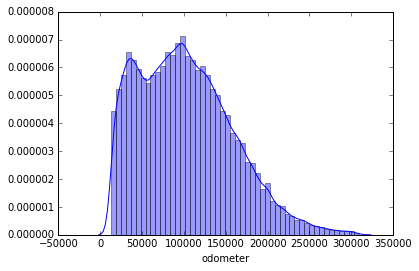

In [51]:
#Odometer

sns.distplot(cars_data["odometer"], bins=50, hist=True, kde=True)
plt.show()

In [52]:
# Title Status

cars_data["title_status"].value_counts()

clean         293947
rebuilt         8387
salvage         3617
lien            2120
missing          160
parts only        39
Name: title_status, dtype: int64

In [53]:
cars_data["title_status"] = cars_data["title_status"].fillna("clean")

In [54]:
# Transmission
cars_data["transmission"].value_counts()

automatic    277368
manual        17792
other         12913
Name: transmission, dtype: int64

In [55]:
cars_data["transmission"] = cars_data["transmission"].fillna("automatic")

In [56]:
# Drive
cars_data["drive"].value_counts()

4wd    114165
fwd     89128
rwd     44577
Name: drive, dtype: int64

In [57]:
cars_data["drive"] = cars_data["drive"].fillna("fwd")

In [58]:
cars_data["drive"] = cars_data["drive"].map({"4wd" : "Forward", "fwd" : "Forward", "rwd" : "Rewind"})

In [59]:
# Drive
cars_data["type"].value_counts()

SUV            64666
sedan          63838
pickup         33189
truck          29687
coupe          12836
hatchback      10198
other           9694
wagon           8456
van             7860
convertible     6645
mini-van        4855
bus              414
offroad          398
Name: type, dtype: int64

In [60]:
cars_data["type"] = cars_data["type"].fillna("Other")

In [61]:
# Paint Color

cars_data["paint_color"].value_counts()

white     62270
black     47759
silver    36594
grey      24640
blue      23868
red       22471
custom     5939
green      5880
brown      5289
yellow     1482
orange     1372
purple      567
Name: paint_color, dtype: int64

In [62]:
# Adding feature to provide the age of the vehicle
cars_data["Age"] = 2020 - cars_data["year"]

In [63]:
# Dropping paint color

cars_data.drop(["paint_color", "year"], axis = 1, inplace = True)

In [64]:
cars_data.head()

,price,cylinders,fuel,odometer,title_status,transmission,drive,type,Description Length,Age
1,13750,6.0,gas,76237.0,clean,automatic,Rewind,sedan,859,6
2,2300,6.0,gas,199000.0,clean,automatic,Forward,Other,334,19
3,9000,5.0,gas,54000.0,clean,automatic,Rewind,pickup,470,16
7,8500,6.0,gas,62800.0,clean,automatic,Rewind,convertible,718,15
9,5950,6.0,gas,102415.0,rebuilt,automatic,Forward,van,4061,16


In [65]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309690 entries, 1 to 435848
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price               309690 non-null  int64  
 1   cylinders           309690 non-null  float64
 2   fuel                309690 non-null  object 
 3   odometer            309690 non-null  float64
 4   title_status        309690 non-null  object 
 5   transmission        309690 non-null  object 
 6   drive               309690 non-null  object 
 7   type                309690 non-null  object 
 8   Description Length  309690 non-null  int64  
 9   Age                 309690 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 26.0+ MB


### Handling Categorical Variables

In [66]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [67]:
le1 = LabelEncoder()
fuel = le1.fit_transform(cars_data["fuel"])

In [68]:
ohe1 = OneHotEncoder()
fuel_ohe = ohe1.fit_transform(fuel.reshape(-1,1))
fuel_ohe = pd.DataFrame(fuel_ohe.toarray(), columns = le1.classes_)

In [69]:
le2 = LabelEncoder()
title = le2.fit_transform(cars_data["title_status"])

In [70]:
ohe2 = OneHotEncoder()
title_ohe = ohe2.fit_transform(title.reshape(-1,1))
title_ohe = pd.DataFrame(title_ohe.toarray(), columns = le2.classes_)

In [71]:
le3 = LabelEncoder()
transmission = le3.fit_transform(cars_data["transmission"])

In [72]:
ohe3 = OneHotEncoder()
transmission_ohe = ohe3.fit_transform(transmission.reshape(-1,1))
transmission_ohe = pd.DataFrame(transmission_ohe.toarray(), columns = le3.classes_)

In [73]:
le4 = LabelEncoder()
drive = le4.fit_transform(cars_data["drive"])

In [74]:
ohe4 = OneHotEncoder()
drive_ohe = ohe4.fit_transform(drive.reshape(-1,1))
drive_ohe = pd.DataFrame(drive_ohe.toarray(), columns = le4.classes_)

In [75]:
le5 = LabelEncoder()
car_type = le5.fit_transform(cars_data["type"])

In [76]:
ohe5 = OneHotEncoder()
car_type_ohe = ohe5.fit_transform(car_type.reshape(-1,1))
car_type_ohe = pd.DataFrame(car_type_ohe.toarray(), columns = le5.classes_)

# Feature Selection

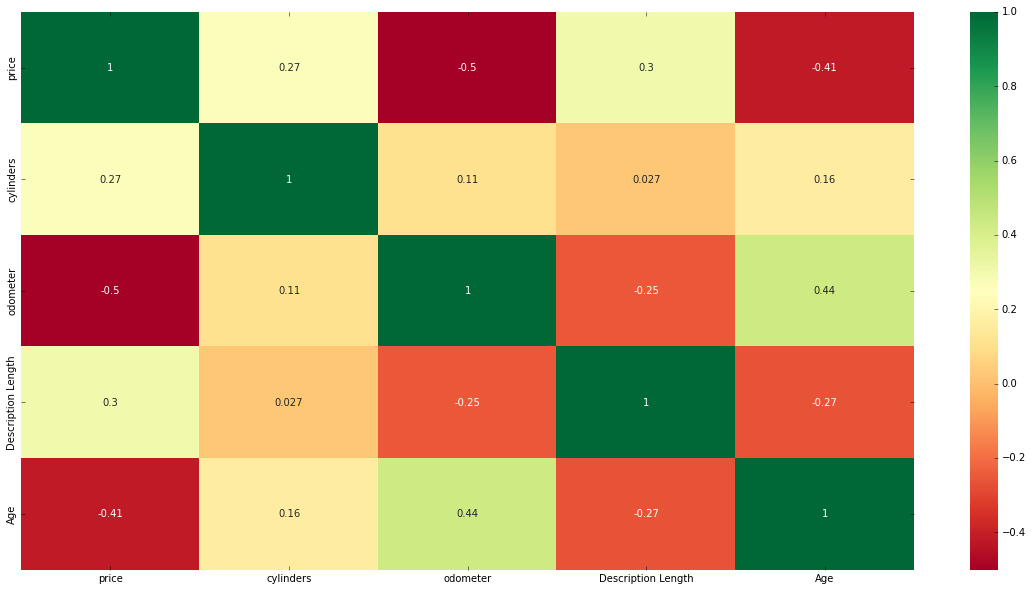

In [77]:
#Finding the correlation

plt.figure(figsize = (20,10))
sns.heatmap(cars_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

### Data Preparation

In [78]:
fuel_ohe.drop([fuel_ohe.columns[len(fuel_ohe.columns)-1]], axis=1, inplace = True)
title_ohe.drop([title_ohe.columns[len(title_ohe.columns)-1]], axis=1, inplace = True)
transmission_ohe.drop([transmission_ohe.columns[len(transmission_ohe.columns)-1]], axis=1, inplace = True)
drive_ohe.drop([drive_ohe.columns[len(drive_ohe.columns)-1]], axis=1, inplace = True)
car_type_ohe.drop([car_type_ohe.columns[len(car_type_ohe.columns)-1]], axis=1, inplace = True)  

In [79]:
num_feat = cars_data[["cylinders", "odometer", "Description Length", "Age"]].reset_index().drop(["index"], axis = 1)

In [80]:
std_scale = StandardScaler()

scaled_num_feat = std_scale.fit_transform(num_feat.values)

In [81]:
X = pd.concat([fuel_ohe, title_ohe, transmission_ohe, drive_ohe, car_type_ohe, pd.DataFrame(scaled_num_feat, columns = num_feat.columns)], axis = 1)

In [82]:
y = cars_data[["price"]]

### Feature Selection

In [83]:
from sklearn.ensemble import ExtraTreesRegressor

In [84]:
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

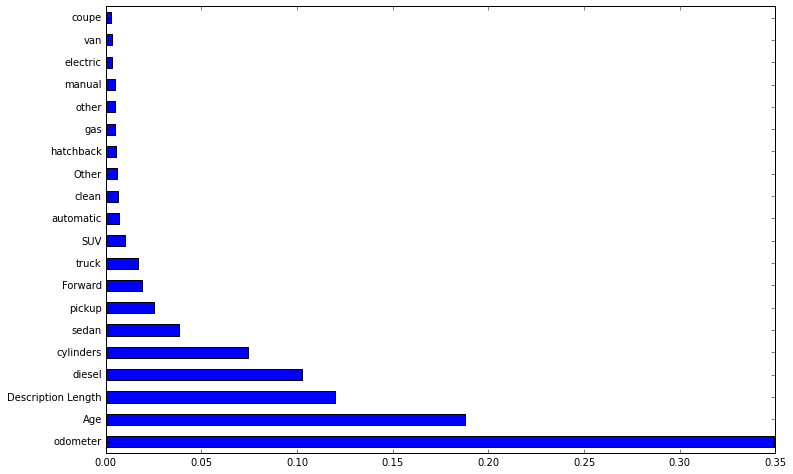

In [85]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size = 0.3, random_state = 50)

### Model Fitting

In [87]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, ShuffleSplit, RandomizedSearchCV

np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [88]:
def fcnPrintErrorMetrics(y_test, y_pred):
    print('R2:', metrics.r2_score(y_test, y_pred))
    print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    #sns.distplot(y_test - y_pred)

In [89]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred)

R2: 0.5939681586968901
MAE: 4411.619349349431
MSE: 38810414.75326477
RMSE: 6229.800538802569


In [90]:
ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train, y_train)
y_pred2 = ridge_regressor.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred2)

R2: 0.5939696348262324
MAE: 4411.597599197136
MSE: 38810273.65794619
RMSE: 6229.7892145678725


In [91]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train,y_train)
y_pred3 = ridge_regressor.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred3)

R2: 0.5939696348262324
MAE: 4411.597599197136
MSE: 38810273.65794619
RMSE: 6229.7892145678725


In [92]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
y_pred4 = dt_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred4)

R2: 0.7155479225674548
MAE: 2677.173064629594
MSE: 27189254.584453966
RMSE: 5214.331652710054


In [93]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred5 = rf_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred5)

R2: 0.8357078197011307
MAE: 2273.9532510277095
MSE: 15703811.892322244
RMSE: 3962.8035394556523


In [94]:
ab_reg = AdaBoostRegressor(loss = "linear")
ab_reg.fit(X_train, y_train)
y_pred6 = ab_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred6)

R2: 0.08610738659958261
MAE: 7853.362597676488
MSE: 87354113.04734932
RMSE: 9346.342228238238


In [95]:
gb_reg = GradientBoostingRegressor(max_depth = 7, max_features = 4, n_estimators = 35)
gb_reg.fit(X_train, y_train)
y_pred7 = gb_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred7)

R2: 0.7075429819939237
MAE: 3620.058944811311
MSE: 27954404.092770614
RMSE: 5287.192458457571


In [96]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred8 = xgb_reg.predict(X_test)

fcnPrintErrorMetrics(y_test, y_pred8)

[06:27:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2: 0.7083123303011445
MAE: 3607.4078170071953
MSE: 27880866.197818507
RMSE: 5280.233536295389


In [97]:
def find_best_model(X, y):
    algos = {
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                "n_estimators" : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)],
                "max_depth" : [int(x) for x in np.linspace(5, 30, num = 6)]         
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])


#model_scores = find_best_model(X.values, y.values)
#model_scores

In [98]:
rf_reg_f = RandomForestRegressor()
rf_reg_f.fit(X.values, y.values)
y_pred = rf_reg.predict(X.values)

fcnPrintErrorMetrics(y.values, y_pred)

R2: 0.9344211256504011
MAE: 1279.2197315301637
MSE: 6255716.600071217
RMSE: 2501.143058697606


### Saving the model

In [99]:
import pickle
import json

In [ ]:
with open('car_price_predictor.pickle','wb') as f:
    pickle.dump(rf_reg_f, f)

In [101]:
cat_feature_columns = {
    "fuel" : [col for col in le1.classes_], 
    "title" : [col for col in le2.classes_],
    "transmission" : [col for col in le3.classes_], 
    "drive" : [col for col in le4.classes_], 
    "car_type" : [col for col in le5.classes_], 
    "data_columns" : [col for col in X.columns],
}

with open("columns.json", "w") as f:
    f.write(json.dumps(cat_feature_columns))